# Install python packages in virtual environment

In [1]:
# %pip install -r requirements.txt

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load .csv data for insured_risks and geo_fenced_areas

In [3]:
geo_fenced_areas = pd.read_csv('./geo_fenced_areas.csv')
geo_fenced_areas["geometry"] = geo_fenced_areas["Coordinates"]
geo_fenced_areas.head()

,Area Code,Area Type,Area Name,Coordinates,Unnamed: 4,geometry
0,1,Area,Qawra Flood Zone,Polygon( (14.424904974509417 35.95866558205259...,NaN,Polygon( (14.424904974509417 35.95866558205259...
1,2,Area,Rabat Gozo Accumulation,Polygon( (14.227186478795375 36.05032950051961...,NaN,Polygon( (14.227186478795375 36.05032950051961...
2,3,Area,Floriana Peninsula,Polygon( (14.517876408092604 35.90339856736989...,NaN,Polygon( (14.517876408092604 35.90339856736989...
3,4,Shore,Malta Shoreline,LINESTRING (14.37393659957712 35.9876503906809...,NaN,LINESTRING (14.37393659957712 35.9876503906809...
4,5,Shore,Gozo Shoreline,LINESTRING(14.254744604640194 36.0756703645815...,NaN,LINESTRING(14.254744604640194 36.0756703645815...


In [4]:
geo_fenced_areas.dtypes

Area Code        int64
Area Type       object
Area Name       object
Coordinates     object
Unnamed: 4     float64
geometry        object
dtype: object

In [5]:
insured_risks = pd.read_csv('./insured_risks.csv')
insured_risks.head()

,Risk ID,Client - Name,Policy # - ID,Policy address,Premium,Sum Insured,Latitude,Longitude,Country,Locality,Geo Point,WKT Coordinates
0,1,John Doe 1,P8700001,"62 College Street, Rabat,Malta",442.537567,250000,35.879819,14.399240,Malta,Rabat,14.399240 35.879819,Point(14.399240 35.879819)
1,2,John Doe 2,P8700002,"B13B Qasam Industrijali ta' Bulebel , Zejtun, ...",298.522125,199560,35.865552,14.527359,Malta,Żejtun,14.527359 35.865552,Point(14.527359 35.865552)
2,3,John Doe 3,P8700003,"Blk A Triq ir-Repubblika, Ir-Rabat (Ghawdex)",538.524597,135000,36.044523,14.241988,Malta,Ir-Rabat Għawdex,14.241988 36.044523,Point(14.241988 36.044523)
3,4,John Doe 4,P8700004,"Triq Diodorus Siculus , San Giljan",579.552185,123989,35.921424,14.490587,Malta,St. Julian's,14.490587 35.921424,Point(14.490587 35.921424)
4,5,John Doe 5,P8700005,"Flat 7, Windsor Ter Windsor Street, Sliema",100.000000,100000,35.912399,14.501768,Malta,Sliema,14.501768 35.912399,Point(14.501768 35.912399)


In [6]:
insured_risks.dtypes

Risk ID              int64
Client - Name       object
Policy # - ID       object
Policy address      object
Premium            float64
Sum Insured          int64
Latitude           float64
Longitude          float64
Country             object
Locality            object
Geo Point           object
WKT Coordinates     object
dtype: object

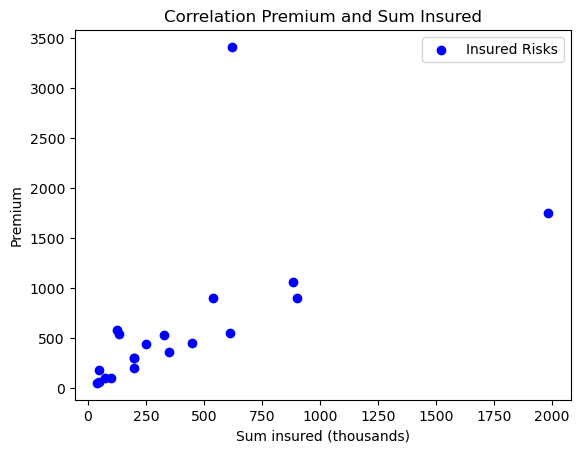

In [7]:
# EDA
x = insured_risks["Sum Insured"] /1000
y = insured_risks["Premium"] 

# Create a scatter plot
plt.scatter(x, y, label='Insured Risks', color='b', marker='o')

# Add labels and a title
plt.xlabel('Sum insured (thousands)')
plt.ylabel('Premium')
plt.title('Correlation Premium and Sum Insured')

# Add a legend (optional)
plt.legend()

# Display the plot
plt.show()

# Visualise spatial data on Maltese Map using geopandas.

In [8]:
malta = gpd.read_file('./AdministrativeUnit-polygon.shp')
malta.head()

,gml_id,nationalCo,localId,namespace,versionId,nationalLe,Country,language,nativeness,nameStatus,sourceOfNa,pronunciat,text,script,residenceO,beginLifes,geometry
0,NC.MT01402,MT01402,MT01402,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,MDINA,None,None,None,"POLYGON ((447040.654 3971185.551, 446999.716 3..."
1,NC.MT01310,MT01310,MT01310,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEJTUN,None,None,None,"POLYGON ((457267.669 3969584.369, 457292.464 3..."
2,NC.MT01407,MT01407,MT01407,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEBBUG (Malta),None,None,None,"POLYGON ((451771.848 3968960.369, 451768.332 3..."
3,NC.MT01206,MT01206,MT01206,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,QORMI,None,None,None,"POLYGON ((453115.422 3970282.927, 453097.354 3..."
4,NC.MT02611,MT02611,MT02611,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,RABAT (Victoria),None,None,None,"POLYGON ((430296.854 3989819.123, 430305.651 3..."


Check the coordinate reference system (CRS) of the maltese map.

In [9]:
malta.crs

<Projected CRS: EPSG:3045>
Name: ETRS89 / UTM zone 33N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - 12°E to 18°E and ETRS89 by country
- bounds: (12.0, 46.4, 18.01, 84.01)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Update maltese map to use the same projection scheme as the data provided, i.e. 4326. Other wise the mapping are misaligned.

In [10]:
# Re-projecting to crs 4326

malta = malta.to_crs("EPSG:4326")

Verify that the projection has been updated. The geometric data included is updated accordingly.

In [11]:
malta.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
malta.head()

,gml_id,nationalCo,localId,namespace,versionId,nationalLe,Country,language,nativeness,nameStatus,sourceOfNa,pronunciat,text,script,residenceO,beginLifes,geometry
0,NC.MT01402,MT01402,MT01402,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,MDINA,None,None,None,"POLYGON ((14.41326 35.88350, 14.41281 35.88343..."
1,NC.MT01310,MT01310,MT01310,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEJTUN,None,None,None,"POLYGON ((14.52665 35.86956, 14.52692 35.86951..."
2,NC.MT01407,MT01407,MT01407,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,ZEBBUG (Malta),None,None,None,"POLYGON ((14.46581 35.86368, 14.46577 35.86366..."
3,NC.MT01206,MT01206,MT01206,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,QORMI,None,None,None,"POLYGON ((14.48061 35.87567, 14.48042 35.87545..."
4,NC.MT02611,MT02611,MT02611,MT.DGL.LocalCouncils,1.0.0,None,MT,None,None,None,None,None,RABAT (Victoria),None,None,None,"POLYGON ((14.22613 36.05043, 14.22623 36.05047..."


Convert data to GeoDataFrames

In [13]:
insured_points = gpd.GeoDataFrame(
    insured_risks, geometry=gpd.points_from_xy(insured_risks.Longitude, insured_risks.Latitude), crs=malta.crs
)

from shapely import wkt
geo_fenced_areas['geometry'] = geo_fenced_areas['geometry'].apply(wkt.loads)
fences = gpd.GeoDataFrame(geo_fenced_areas, geometry='geometry', crs=malta.crs)
fences.head()

,Area Code,Area Type,Area Name,Coordinates,Unnamed: 4,geometry
0,1,Area,Qawra Flood Zone,Polygon( (14.424904974509417 35.95866558205259...,NaN,"POLYGON ((14.42490 35.95867, 14.40631 35.94894..."
1,2,Area,Rabat Gozo Accumulation,Polygon( (14.227186478795375 36.05032950051961...,NaN,"POLYGON ((14.22719 36.05033, 14.22719 36.03645..."
2,3,Area,Floriana Peninsula,Polygon( (14.517876408092604 35.90339856736989...,NaN,"POLYGON ((14.51788 35.90340, 14.49813 35.89327..."
3,4,Shore,Malta Shoreline,LINESTRING (14.37393659957712 35.9876503906809...,NaN,"LINESTRING (14.37394 35.98765, 14.36829 35.997..."
4,5,Shore,Gozo Shoreline,LINESTRING(14.254744604640194 36.0756703645815...,NaN,"LINESTRING (14.25474 36.07567, 14.22777 36.080..."


In [14]:
fences.columns

Index(['Area Code ', 'Area Type  ', 'Area Name', 'Coordinates', 'Unnamed: 4',
       'geometry'],
      dtype='object')

In [15]:
# Select only shores and areas

shores = fences[fences['Area Type  '] != 'Area']
risk_areas = fences[fences['Area Type  '] == 'Area']

In [16]:
# Set styles for maps
sns.set(
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":18,
                                "axes.labelsize":18})

plt.rcParams["figure.figsize"] = (50,10)

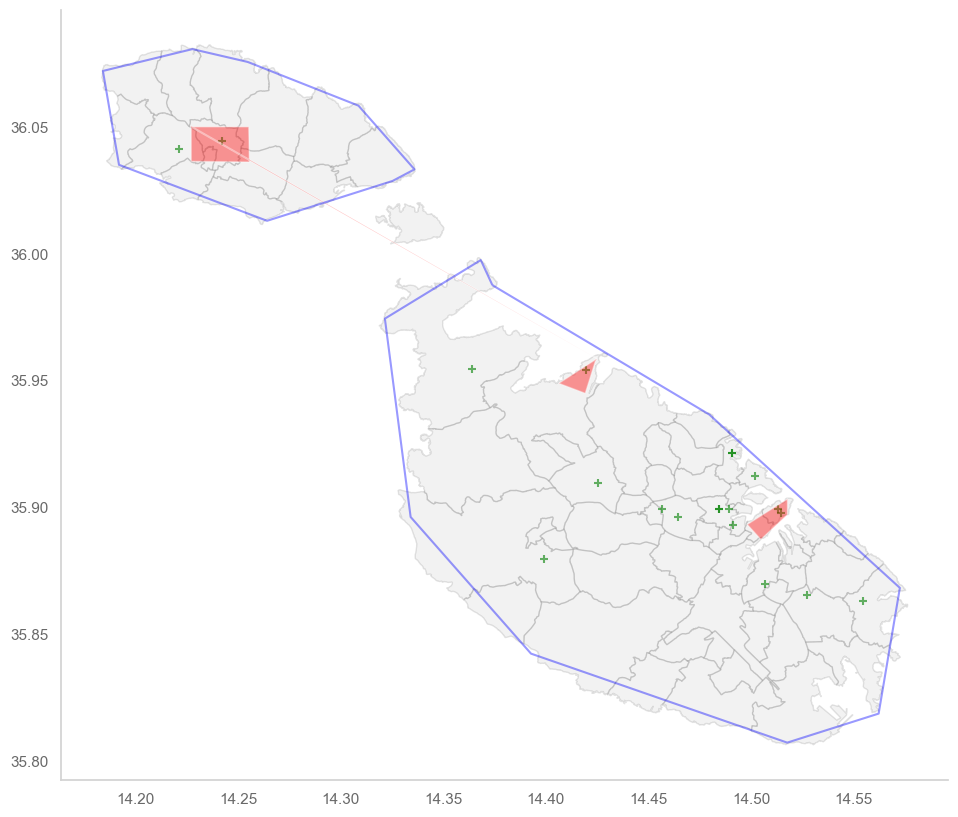

In [17]:
# Plot polygons for area, lines for shores and points for insured risks on Maltese Map (using shapefile from the PA).

# Plot the shapefile
ax = malta.plot(color="grey", edgecolor="black", alpha=0.1)

# Plot the points
insured_points.plot(ax=ax, color="green", alpha=0.6, marker="+")

shores.plot(ax=ax, color="blue", alpha=0.4)
risk_areas.plot(ax=ax, color="red", alpha=0.4)

# Display the plot
plt.show()

1) Create a procedure which denotes whether or not an Insured risks lies between a perimeter of a named geofenced area (Area Type = Area). The end result should be an output that depicts each and every risk and their possible associations to a geofenced area. If a risk does not fall within a named geofenced area then this should be shown as Not Applicable.

Hints: 
What is geofenced area? A geofence is a virtual fence or perimeter around a physical location. Like a real fence, a geofence creates a separation between that location and the area around it.
Technical Hints: Usage of the geometry Data Type such as 
geometry::STGeomFromText(p.AreaCoordinates,4326)
STIntersects(GEOMETRY::STGeomFromWKB(@set_statement_point.STAsBinary(), 4326))

2) Create a procedure which calculates each insured risks relevant distance from the shoreline when compared to predesignated geofenced area (Area Type = Shore). The distance from shoreline should be clearly shown for each risk 
      
Hints: 
Take into consideration that we have risks spread over Malta and Gozo 
Technical Hint:  Usage of the geometry Data Types such as STDistance 

-- Data cleaning steps,
-- update shores to use LineString instead of Polygon
-- make geometric data valid, start point must be the same as the end point
-- Check that the geometric is valid using the STIsValid() function


SELECT risk_id, point_geometry.STIsValid() from insured_risks

update geofenced_area
set polygon_geometry = polygon_geometry.MakeValid()
where polygon_geometry.STIsValid() = 0;

-- Procedure 1

CREATE OR ALTER PROCEDURE IsWithinGeofencedArea
AS
BEGIN

-- For every insured_risk row, check if within area of polygons,
-- then aggregate the results to get all possible risks, where is no risks are found return Not Applicable
SELECT N.risk_id, ISNULL(STRING_AGG(N.RiskResult, ','), 'Not Applicable') AS 'Risks detected'
FROM (SELECT
    pt.risk_id,
    CASE WHEN pt.point_geometry.STIntersects(pg.polygon_geometry) = 1
        THEN pg.area_name END AS RiskResult
FROM
    insured_risks pt
CROSS JOIN
    geofenced_area pg
WHERE pg.area_type = 'Area') n
GROUP BY N.risk_id

END

EXEC IsWithinGeofencedArea

-- Procedure 2
CREATE OR ALTER PROCEDURE GetMinimumDistanceToShore
AS
BEGIN

Select N.risk_id, MIN(N.distance) AS "Min distance to shore" FROM
(SELECT
    pt.risk_id,
    pt.point_geometry.STDistance(pg.polygon_geometry) as "distance"
FROM insured_risks pt
CROSS JOIN geofenced_area pg
WHERE pg.area_type = 'Shore') N
GROUP BY N.risk_id
ORDER BY N.risk_id ASC


END

CREATE OR ALTER PROCEDURE GetDistanceToSpecificShore(@inputShoreAreaCode int)
AS
BEGIN

SELECT
    r.risk_id,
    g.area_name AS "Shore name",
    r.point_geometry.STDistance(g.polygon_geometry) AS "Distance to shore"
FROM insured_risks r
JOIN geofenced_area g ON g.area_code = @inputShoreAreaCode
WHERE g.area_type = 'Shore' and r.country = 'Malta'

END


EXEC GetDistanceToShore

EXEC GetDistanceToSpecificShore 4